In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import gmean
from sklearn.decomposition import PCA
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#Local module
from pathway_modules import PathwayAnalysis

## Initial data reading
#### Read the file with the mean of $e_{normal}$ and $e_{tumor}$
1. Store expression data in a dataframe

In [2]:
data_path = os.path.join('data_generated', 'mean_fold_change_values', 'mean_fold_change_values.csv')

fold_change = pd.read_csv(data_path, index_col=0)
fold_change

,BLCA,BRCA,COAD,ESCA,HNSC,KIRC,KIRP,LIHC,LUAD,LUSC,PRAD,READ,STAD,THCA,UCEC
ENSG00000242268,0.723703,1.313878,0.186694,0.645869,0.166368,0.767995,1.180487,6.481807e-01,0.716307,0.803819,0.197078,9.722275e-02,0.373626,2.408171,0.745705
ENSG00000270112,0.070993,0.088488,0.071976,0.179335,0.200274,0.905208,0.787771,2.056793e-02,0.101943,0.074202,0.067982,3.730206e-02,0.093079,0.144915,0.182772
ENSG00000167578,0.826221,0.716718,0.747987,0.684242,0.537122,0.593190,0.528243,9.044747e-01,0.511680,0.525663,0.445344,4.932194e-01,0.508596,0.444004,0.849742
ENSG00000273842,0.037860,0.020459,0.025365,0.396322,0.053426,0.045192,0.021789,8.789959e-03,0.005574,0.010438,0.005901,1.719218e-02,0.152249,0.013659,0.069688
ENSG00000078237,0.652492,0.568197,0.757721,0.834798,0.822466,0.438514,0.610531,8.417925e-01,0.448007,0.504977,0.510227,7.079706e-01,0.924890,0.676255,1.019389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000105063,0.599414,0.805521,0.502164,0.673859,0.446532,0.352341,0.353906,1.242361e+00,0.540698,0.575856,0.273646,5.378616e-01,0.604080,0.345251,0.631648
ENSG00000231119,0.697769,0.608103,0.611733,0.715416,0.650419,0.623821,0.756005,7.074551e-01,1.223586,1.131301,0.609678,4.629185e-01,0.668989,0.631451,1.414584
ENSG00000280861,0.010723,0.020992,0.010528,0.215597,0.020826,0.010229,0.015147,2.562741e-15,0.037102,0.035581,0.035893,3.203427e-16,0.094693,0.019371,0.050850
ENSG00000123685,1.010225,0.722757,0.732507,0.723120,0.952046,1.785353,0.729681,7.183345e-01,0.894266,1.129459,0.638541,7.331938e-01,0.751825,0.939245,0.776433


## Pathways
#### Top 28 pathways from Reactome
Read the pathway data and get the expression matrix

In [3]:
top_pathway_path = os.path.join('data_external' , 'data_pathways', 'Top_pathways.csv')
pathw = PathwayAnalysis(pathway_file=top_pathway_path)

pathw.fold_change = fold_change
X = pathw.pathway_expression()

X

,BLCA,BRCA,COAD,ESCA,HNSC,KIRC,KIRP,LIHC,LUAD,LUSC,PRAD,READ,STAD,THCA,UCEC
Autophagy,0.671873,0.661232,0.643531,0.666534,0.601232,0.661882,0.633437,0.808687,0.672966,0.799953,0.439041,0.647249,0.619457,0.424050,0.775988
Cell Cycle,1.162035,1.034842,0.897655,1.197068,0.933453,0.727451,0.713066,1.230074,1.015335,1.343283,0.596061,0.799330,1.037806,0.496869,1.337517
Cell-Cell communication,1.191453,1.075550,1.041923,1.246295,1.069863,1.200750,1.276176,0.927429,1.108882,1.393716,0.720591,1.075462,1.134208,0.874975,1.251150
Cellular responses to stimuli,0.921682,0.847823,0.849869,0.893613,0.797937,0.801383,0.820341,0.987196,0.840191,1.010958,0.608598,0.830027,0.795019,0.576287,1.016218
Chromatin organization,1.312540,1.246842,0.974883,1.178693,0.937504,0.760501,0.642473,0.938639,1.119369,1.235445,0.808811,0.746463,0.922842,0.573007,1.491112
Circadian Clock,0.916691,0.827565,0.747248,0.783668,0.748764,0.821831,0.777044,0.854983,0.728926,0.837641,0.580169,0.757734,0.693602,0.723980,0.944404
DNA Repair,0.976788,0.862227,0.786440,1.014081,0.814845,0.657501,0.634836,0.984768,0.848395,1.047194,0.551006,0.684904,0.849326,0.474005,1.058042
DNA Replication,1.101121,0.927689,0.862705,1.205910,0.898118,0.650587,0.640517,1.137115,0.986428,1.329353,0.531005,0.754562,0.950519,0.441480,1.221482
Developmental Biology,1.083645,0.999489,0.910287,1.118192,0.997915,0.897036,0.913421,0.883068,0.948928,1.208111,0.673069,0.933251,0.946593,0.658507,1.173064
Digestion and absorption,0.556074,0.638569,1.562375,1.689218,0.611989,0.997263,1.058181,0.852057,0.807921,0.882044,0.571451,1.559003,1.579139,0.335461,0.650775


Table I Number of samples and average log-fold change of genes in the 15 tumors studied in the paper

In [4]:
average = pathw.fold_change.abs().mean()
average.to_csv(os.path.join('.', 'figures_tables', 'Table_I.csv'), header=False)
average

BLCA    0.540790
BRCA    0.521133
COAD    0.532160
ESCA    0.621938
HNSC    0.465273
KIRC    0.544169
KIRP    0.527210
LIHC    0.460329
LUAD    0.550956
LUSC    0.605684
PRAD    0.397914
READ    0.512871
STAD    0.611880
THCA    0.404838
UCEC    0.628198
dtype: float64

### Principal Components Analysis
- Transpose the matrix X first
- And make an uncentered PCA

In [5]:
Y = X.T
# PCA class
pca = PCA(6)
# Tissues as samples and pathways as features
P_matrix = pca.fit(Y)
# Make the mean 0 to uncenter
pca.mean_ = np.zeros(Y.shape[1])
# PCA transformation matrix
P_matrix = pca.transform(Y)

### Components
Histogram of components

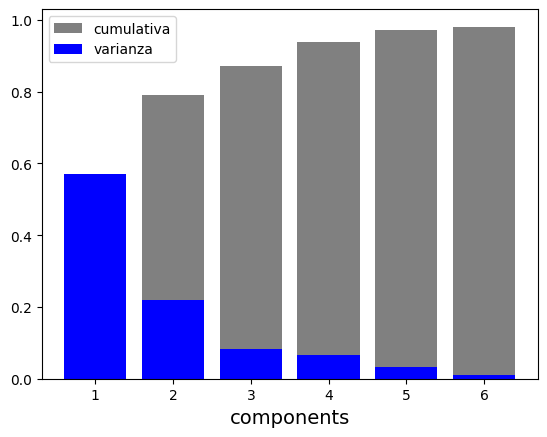

In [6]:
variance = pca.explained_variance_ratio_
label = [r'cumulativa',r'varianza']

plt.bar(np.arange(1,7), variance.cumsum(), color='grey')
plt.bar(np.arange(1,7), variance, color='blue')
plt.xlabel('components', size=14)

plt.legend(label)

Table of components

In [7]:
projections_table = pd.DataFrame(P_matrix, columns=[f'PC{i}' for i in range(1, 7)])
# Set the index as the tissues type
projections_table.index = pathw.pathway_data.columns
# Visualization
projections_table

,PC1,PC2,PC3,PC4,PC5,PC6
BLCA,5.314872,-0.272648,0.762046,1.014768,-0.040929,0.179731
BRCA,4.963872,-0.063581,0.785157,1.007517,0.044755,0.103150
COAD,4.908816,0.951556,0.613972,0.871203,0.005763,0.178526
ESCA,5.580182,0.784132,0.240770,0.956250,0.106615,-0.001495
HNSC,4.730044,-0.061895,0.555011,1.346579,0.382571,0.340072
KIRC,4.659502,0.640043,1.125120,1.272520,0.193476,0.004415
KIRP,4.634670,0.796913,1.353437,1.205473,0.010083,0.108893
LIHC,5.124072,0.364320,1.059478,0.262153,0.399508,0.171910
LUAD,4.867079,0.080398,0.567720,0.977636,0.132158,0.046964
LUSC,5.886118,0.022066,0.680995,1.130214,0.253123,0.082911


### Weights
Stored in csv files

In [8]:
# DataFrame for all components weights
for i in range(2):
    # Create the table
    arg = np.argsort(-np.abs(pca.components_[i, :]))
    pci = pd.DataFrame({
        f'PC{i + 1}': pca.components_[i, arg],
        'Pathways': np.array(pathw.pathway_names)[arg]
    })
    # Sort descending
    # pci.sort_values(f'PC{i + 1}', ascending=False)
    # Store it
    path = os.path.join('.', 'data_generated', f'weights_PC{i + 1}.csv')
    pci.to_csv(path)

Separate the group of points and create array of labels

In [9]:
# will be use as labels
hue = np.array(fold_change.shape[1]*['Cluster 1'])

# Use numpy logical indexing to set elements in 'hue' based on conditions
hue[P_matrix[:, 1] > 0.4] = 'Cluster 2'
hue[P_matrix[:, 0] < 3.5] = 'Cluster 3'

### Descriptive scatterplot

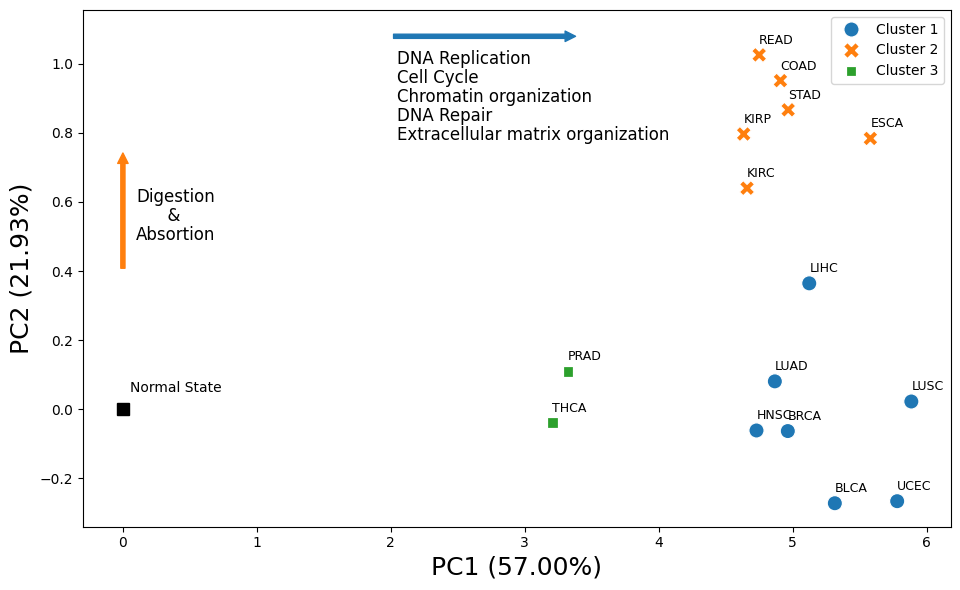

In [10]:
# Set figure dimension
fig_height = 6
fig_width = fig_height * 1.618
fig = plt.figure(figsize=(fig_width, fig_height), facecolor='w')

# get current axe
ax = plt.gca()

# The axes labels
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})', fontsize=18)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})', size=18)
# xy limits
# plt.xlim(-0.3, 5.75)
# plt.ylim(-0.65, 0.7)

# Scatterplot 
sns.scatterplot(x=P_matrix[:, 0], y=P_matrix[:, 1], hue=hue, s=120,
                style=hue)
# Normal state point
plt.plot(0, 0, 's', color='k', markersize=8)
plt.annotate('Normal State', xy=(0.05, 0.05), xycoords='data', fontsize=10)

# Horizontal arrow
harrow = mpatches.FancyArrowPatch((2, 1.08), (3.4, 1.08),
                                  mutation_scale=15, color="C0")
# Horizontal arrow annotations
ax.annotate('DNA Replication',
            xy=(2.05, 1.0), xycoords='data', fontsize=12)
ax.annotate('Cell Cycle',
            xy=(2.05, 0.945), xycoords='data', fontsize=12)
ax.annotate('Chromatin organization',
            xy=(2.05, 0.890), xycoords='data', fontsize=12)
ax.annotate('DNA Repair',
            xy=(2.05, 0.835), xycoords='data', fontsize=12)
ax.annotate('Extracellular matrix organization',
            xy=(2.05, 0.780), xycoords='data', fontsize=12)
ax.add_patch(harrow)

# Vertical arrow
varrow = mpatches.FancyArrowPatch((-0.0, 0.4), (-0.0, 0.75),
                                 mutation_scale=15, color="C1")
# Vertical annotations
ax.annotate('Digestion',
            xy=(0.10, 0.60), xycoords='data', fontsize=12)
ax.annotate('      &',
            xy=(0.10, 0.545), xycoords='data', fontsize=12)
ax.annotate('Absortion',
            xy=(0.10, 0.490), xycoords='data', fontsize=12)
ax.add_patch(varrow)

# Add the labels to the points
for i in range(fold_change.shape[1]):
    plt.annotate(fold_change.columns[i], (P_matrix[:, 0][i], P_matrix[:, 1][i]), 
                 textcoords='offset points', xytext=(0, 8), fontsize=9)

# Store the fig
plt.tight_layout()
path = os.path.join('.', 'figures_tables', 'Fig_3.pdf')
fig.savefig(path, bbox_inches='tight')

## Heat Maps

## Figure I

In [11]:
n = len(pathw.pathway_names)
comm_mat = np.zeros((n, n), dtype=int)
for i, name_i in enumerate(pathw.pathway_names):
    for j, name_j in enumerate(pathw.pathway_names[i:], start=i):
        genes_i = set(pathw.pathways[pathw.pathways.Pathway == name_i].Gene)
        genes_j = set(pathw.pathways[pathw.pathways.Pathway == name_j].Gene)
        comm_mat[i, j] = len(genes_i & genes_j)

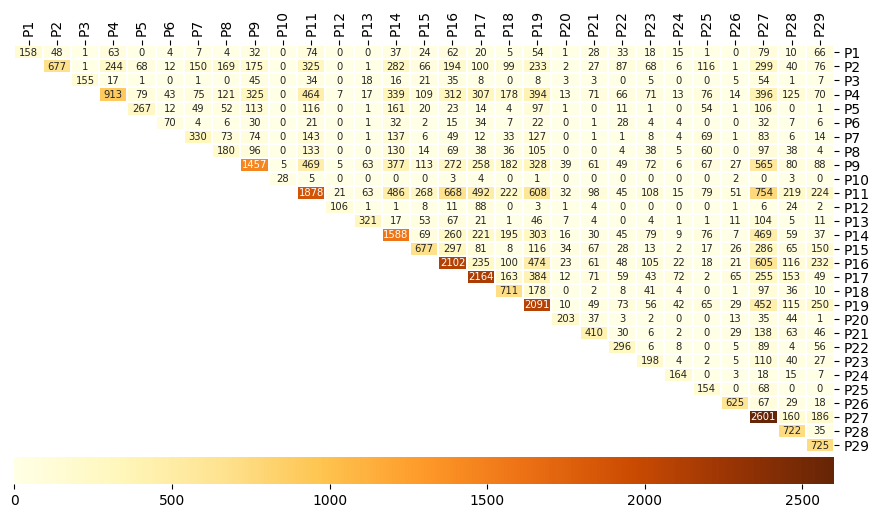

In [12]:
ticks_label = [f'P{i}' for i in range(1, 30)]
mask = np.ones_like(comm_mat, dtype=bool)
mask[np.triu_indices_from(mask)]= False
fig_height = 5.5
fig_width = fig_height * 1.618
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
sns.heatmap(comm_mat, fmt='d', square = False, linewidths = .2, cmap = 'YlOrBr',
            mask=mask,
            cbar_kws={'orientation': 'horizontal', 'pad': 0.01, 'aspect': 30},
            annot = True,
            annot_kws = {'size': 7.2},
            ax=ax)
ax.set_yticks(np.arange(0.5, 29.5, 1), labels=ticks_label, rotation=0)
ax.set_xticks(np.arange(0.5, 29.5, 1), labels=ticks_label, rotation=90)
ax.xaxis.tick_top()
ax.yaxis.tick_right()
plt.tight_layout()
path = os.path.join('.', 'figures_tables', 'Fig_1.pdf')
fig.savefig(path)

## Figure II

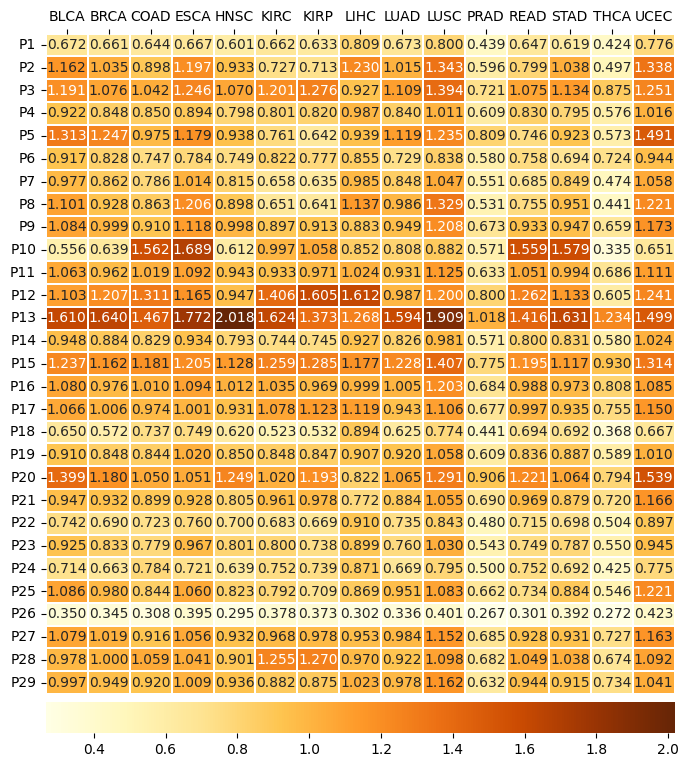

In [13]:
y_ticks_label = [f'P{i}' for i in range(1, 30)]
fig_width = 7.0
fig_height = fig_width * 1.2
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
sns.heatmap(pathw.pathway_data,
            fmt='.3f', square = False, linewidths = .2, cmap = 'YlOrBr',
            cbar_kws={'orientation': 'horizontal', 'pad': 0.01,},
            annot = True,
            ax=ax)
ax.set_yticks(np.arange(0.5, 29.5, 1), labels=y_ticks_label, rotation=0)
ax.xaxis.tick_top()
plt.tight_layout()
path = os.path.join('.', 'figures_tables', 'Fig_2.pdf')
fig.savefig(path, bbox_inches='tight')

## Showing there is not correlation beetwen the fold change and the number of genes in each pathway

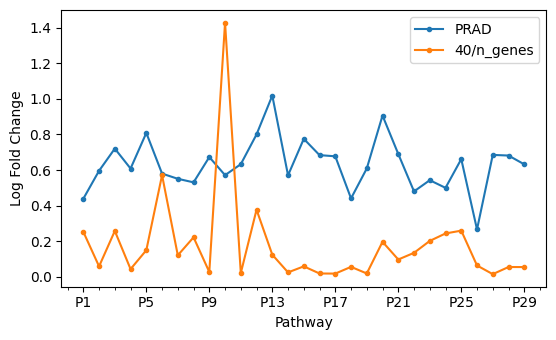

In [14]:
x = [f'P{i}' for i in range(1, 30)]

fig_height = 3.5
fig_width = fig_height * 1.618
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

plt.plot(x, pathw.pathway_data['PRAD'], 'o-', ms=3, label='PRAD')
plt.plot(x, 40/np.diag(comm_mat), 'o-', ms=3, label='40/n_genes')

ax.set_xticks([x[i] for i in range(0, len(x), 4)])
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))

plt.legend()
plt.xlabel('Pathway')
plt.ylabel('Log Fold Change')
plt.tight_layout()

path = os.path.join('figures_tables', 'suppl_fig_1.pdf')
plt.savefig(path)